# EDA

## Packages import and utility functions

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.special import logit
import matplotlib.pyplot as plt


def corrfunc(x, y, ax=None, **kws):
    from scipy.stats import pearsonr

    """Plot the correlation coefficient in the top left hand corner of a plot."""
    nas = np.logical_or(x.isna(), y.isna())

    r, _ = pearsonr(x[~nas], y[~nas])

    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

## Load data

In [92]:
df_test_center = pd.read_csv("./Dataset/test_center2023_11_14_19_52.csv")
df_test_center.head()

,Test Center,pRate,pRate22,pRate21,pRate20,pRate19,pRate18,pRate17,pRate16,pRate15,...,schools10Km,schools15Km,schools20Km,schools25Km,bstop1Km,bstop5Km,bstop10Km,bstop15Km,bstop20Km,bstop25Km
0,Aberdeen North,0.540643,0.497256,0.586460,0.595685,0.525232,0.554287,NaN,NaN,NaN,...,2,2,2,2,100,944,1364,1595,1676,1969
1,Aberdeen South (Cove),0.555662,0.559935,0.610141,0.627207,0.578401,0.535264,NaN,NaN,NaN,...,2,2,2,2,15,288,1118,1549,1696,1821
2,Abergavenny,0.587358,0.594071,0.606086,0.605538,0.543415,0.563244,NaN,NaN,NaN,...,0,3,6,7,3,19,70,269,533,1073
3,Aberystwyth (Park Avenue),0.563824,0.625290,0.614179,0.574907,0.509206,0.495951,NaN,NaN,NaN,...,1,1,1,1,14,109,143,168,192,223
4,Airdrie,0.478275,0.498094,0.537110,0.489113,0.452222,0.469523,NaN,NaN,NaN,...,21,28,37,40,46,404,1221,2867,4847,6355


In [93]:
df_pass_rate = pd.read_pickle("./Dataset for the project dvsa1203.ods/dvsa1203_cleaned.pkl")
df_pass_rate.head()

,Location,Year,Gender,Age,Conducted,Passes,Pass rate
0,Aberdeen North,2022,Male,17.0,387.0,222.0,0.573643
1,Aberdeen North,2022,Male,18.0,220.0,106.0,0.481818
2,Aberdeen North,2022,Male,19.0,128.0,67.0,0.523438
3,Aberdeen North,2022,Male,20.0,119.0,61.0,0.512605
4,Aberdeen North,2022,Male,21.0,106.0,46.0,0.433962


# pRate vs test center location features
## test center:lng/lat

In [94]:
# plot the pass rate in the map with the test center's lat and lng
import folium
from folium.plugins import HeatMap

map_ = folium.Map(location=[54.5, -4], zoom_start=6)


# 定义一个函数来根据通过率返回颜色
def get_color(pass_rate, threshold=0.6):
    return 'red' if pass_rate > threshold else 'green'


# 遍历DataFrame，为每个驾校添加标记
for _, row in df_test_center.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=5,
        color=get_color(row['pRate'], threshold=df_test_center["pRate"].median()),
        fill=True,
        fill_color=get_color(row['pRate'], threshold=df_test_center["pRate"].median()),
    ).add_to(map_)
map_

## test center features: roundabout
seems that `roundabouts15km` is a good feature

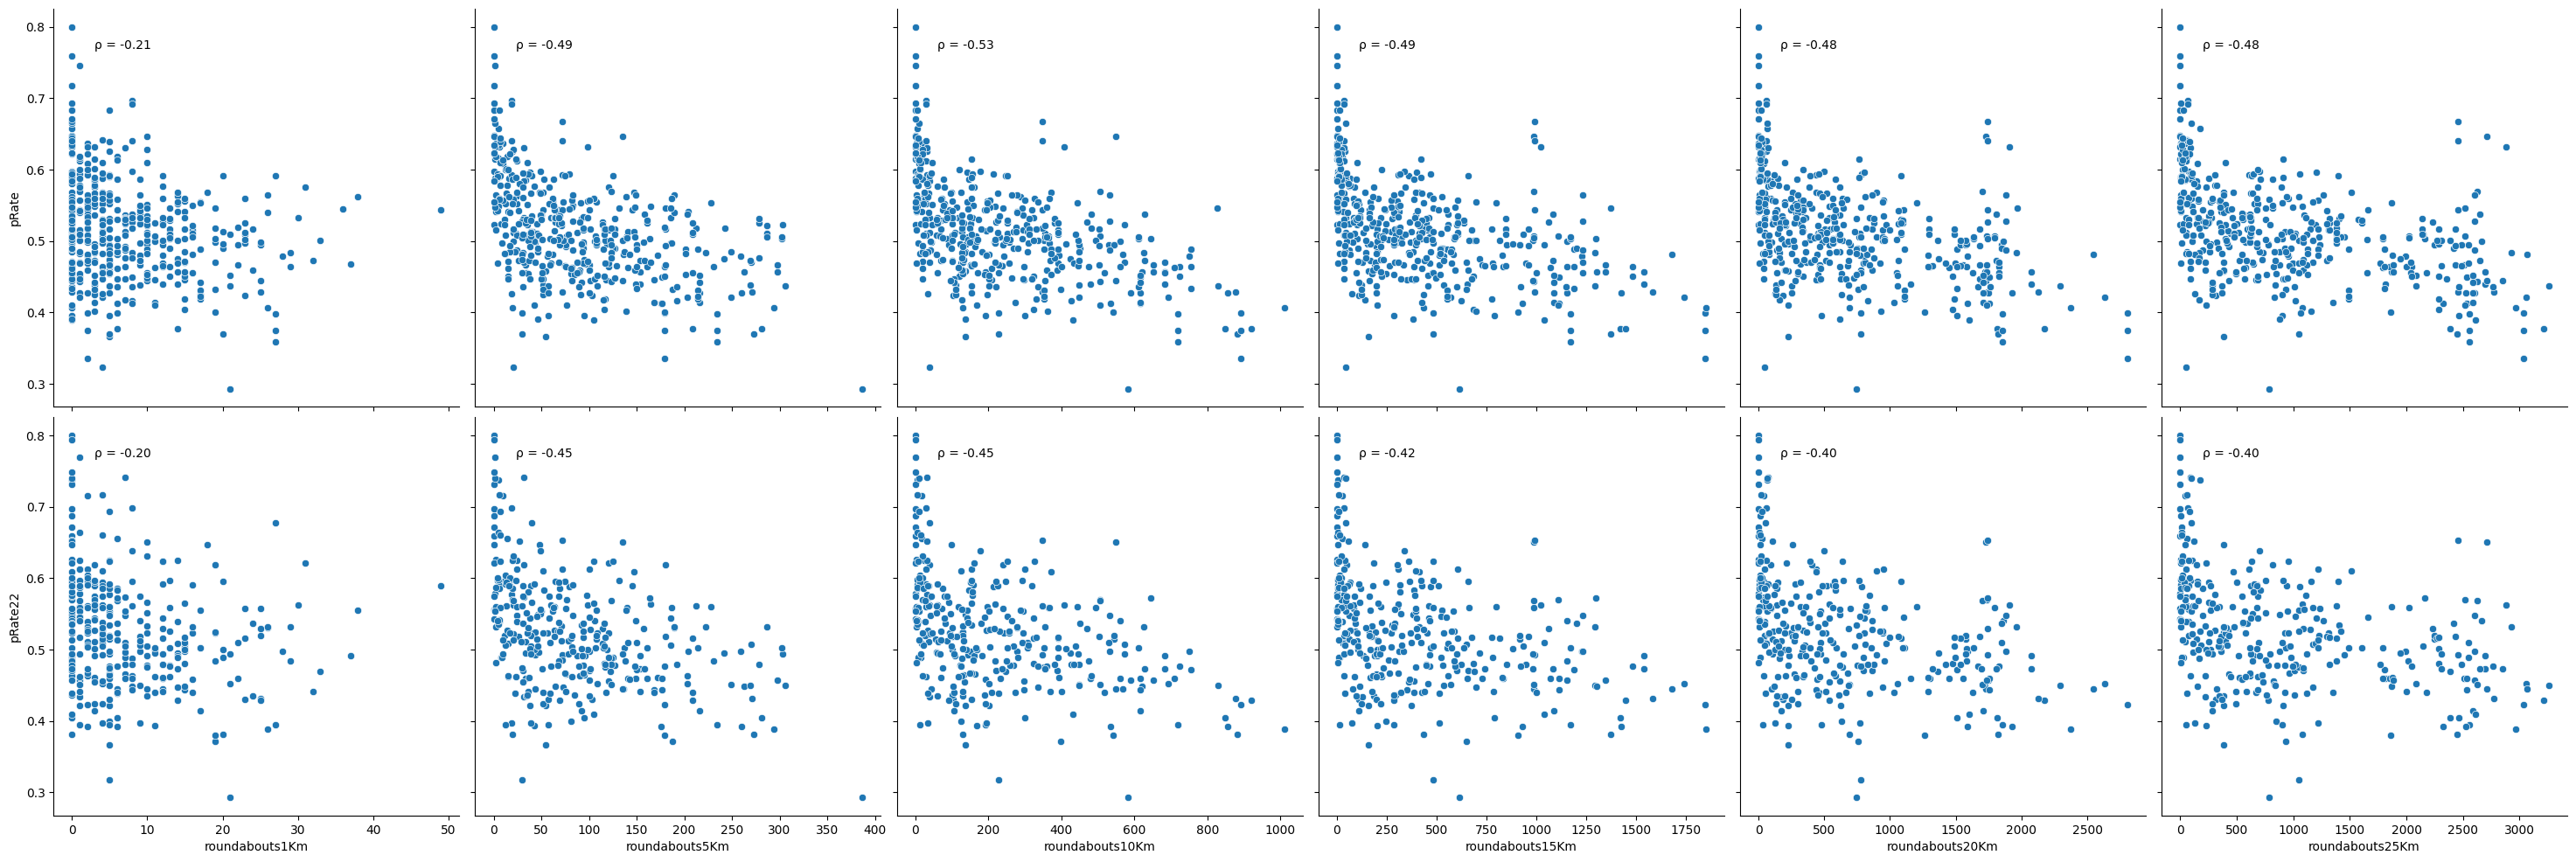

In [95]:
x_features = [_ for _ in df_test_center.columns if "roundabouts" in _]

g = sns.pairplot(x_vars=x_features, y_vars=["pRate", "pRate22"], data=df_test_center, height=5)
g.map(corrfunc)
plt.show()

## test center features: traffic lights
seems that `traffic_lights*km` is a NOT good feature

<Figure size 2000x2000 with 0 Axes>

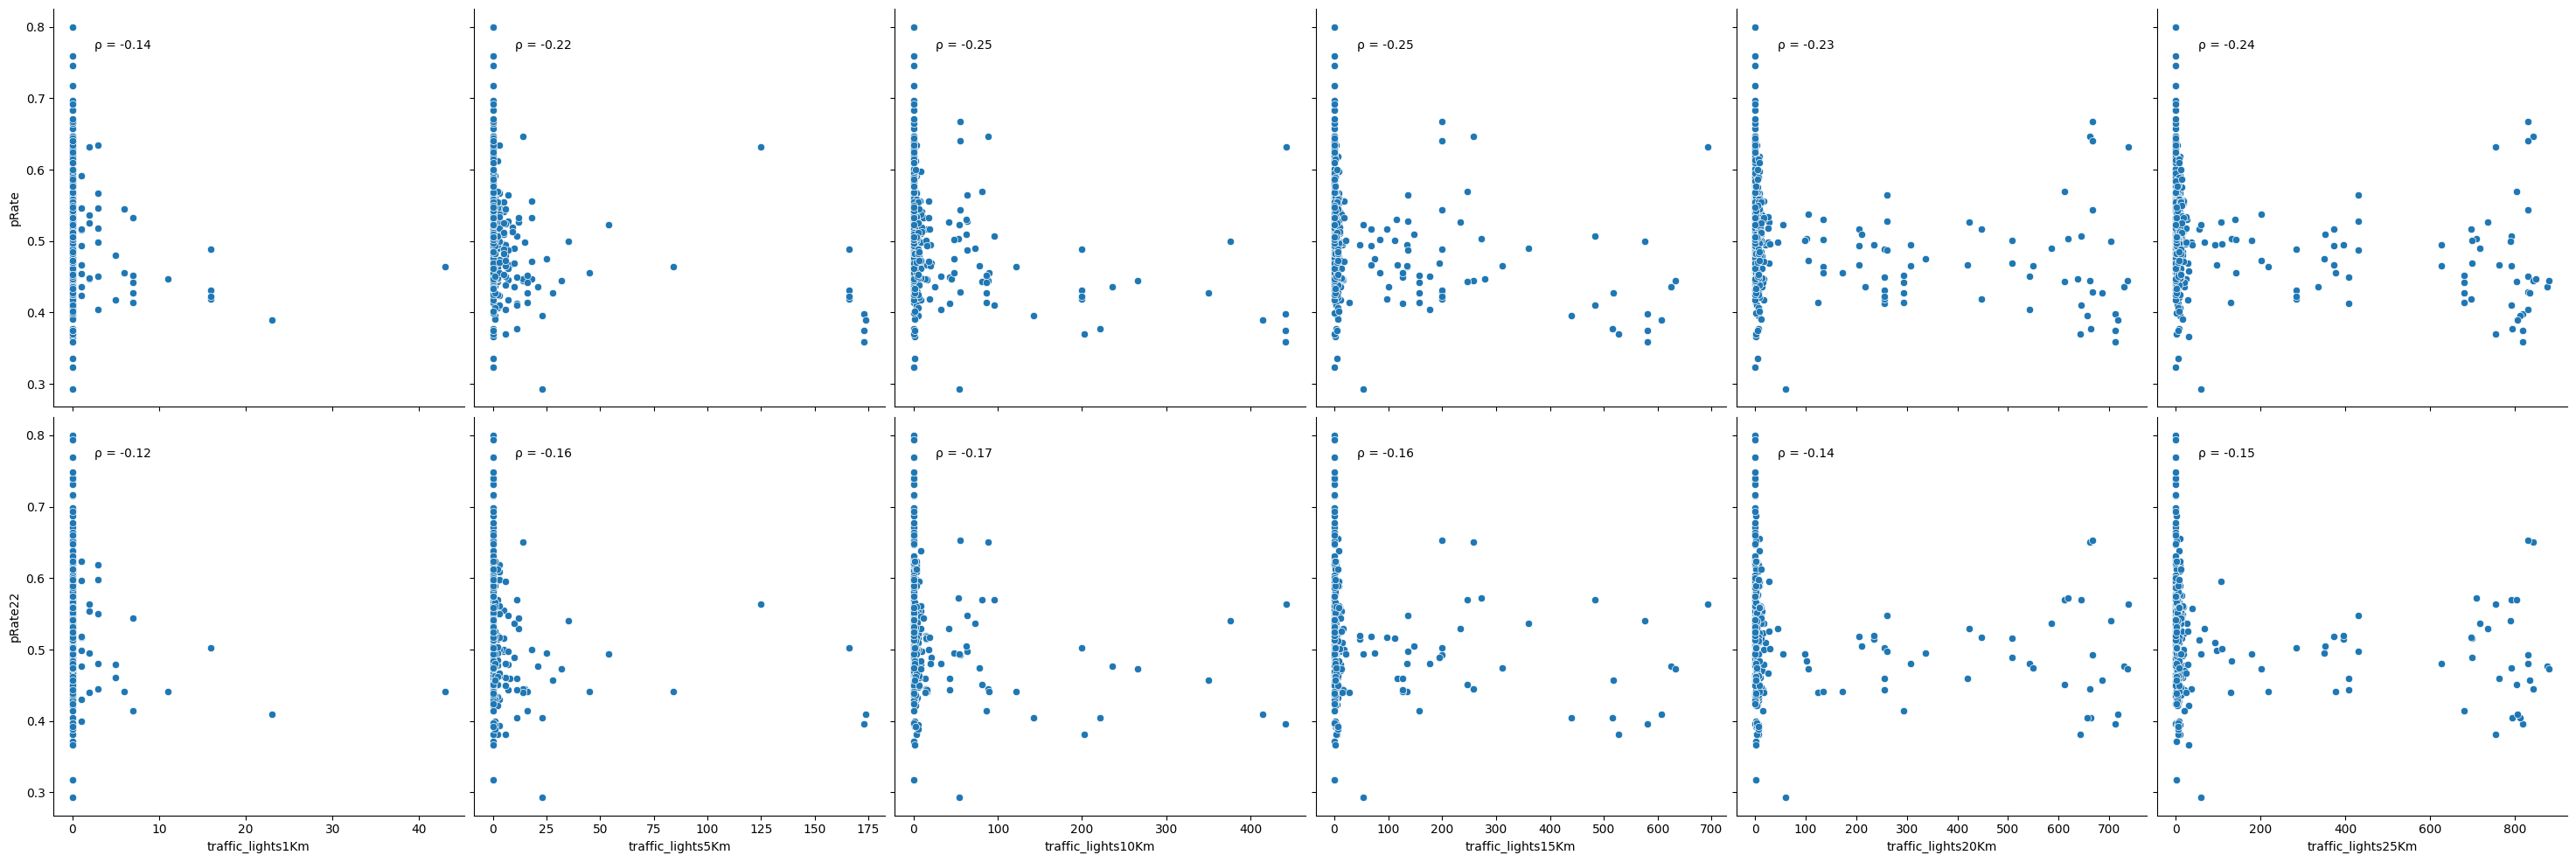

In [96]:
x_features = [_ for _ in df_test_center.columns if "traffic_lights" in _]

plt.figure(figsize=(20, 20))
g = sns.pairplot(x_vars=x_features, y_vars=["pRate", "pRate22"], data=df_test_center, height=5)
g.map(corrfunc)
plt.show()

## test center features: traffic_signals
seems that `traffic_signals10km` is a good feature

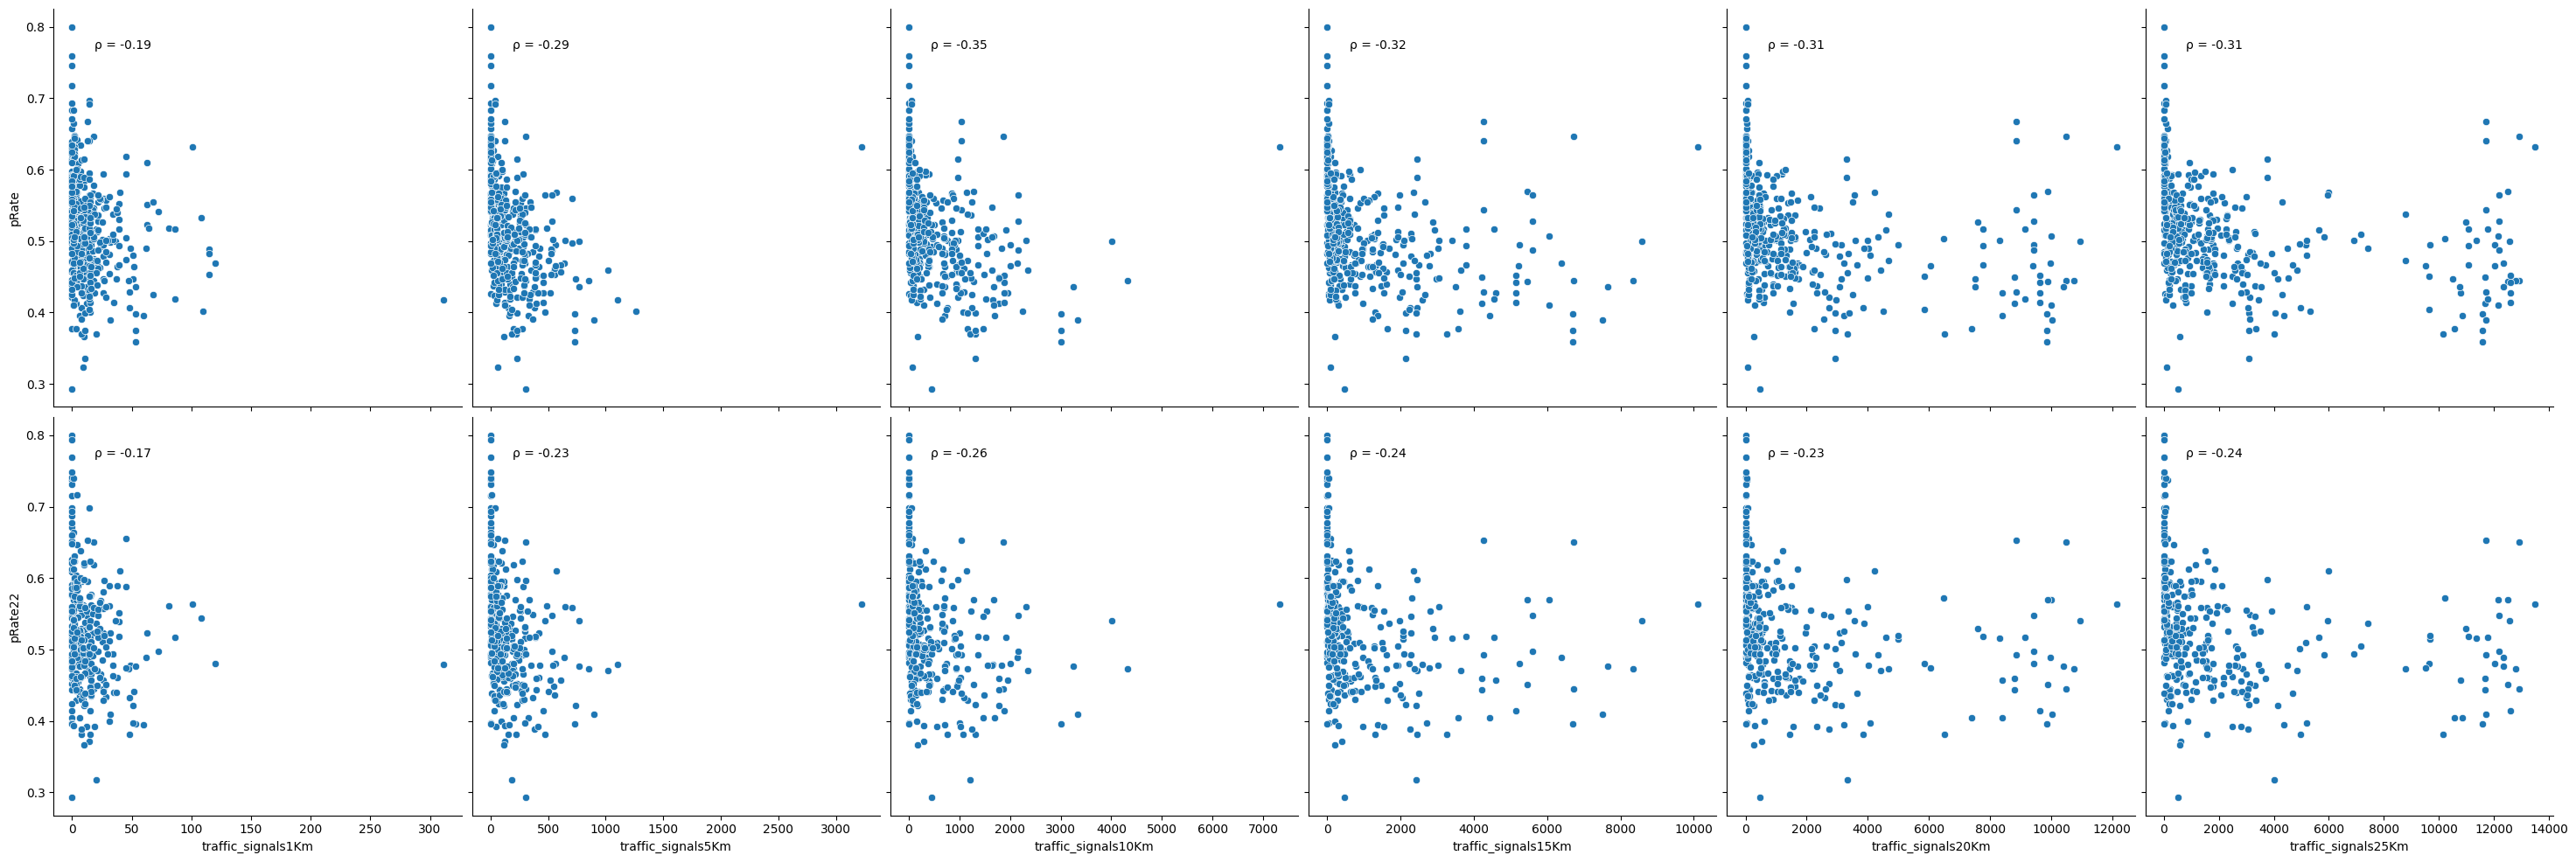

In [97]:
x_features = [_ for _ in df_test_center.columns if "traffic_signal" in _]

g = sns.pairplot(x_vars=x_features, y_vars=["pRate", "pRate22"], data=df_test_center, height=5)
g.map(corrfunc)
plt.show()

## test center features: schools
seems that `schools10km` is a good feature

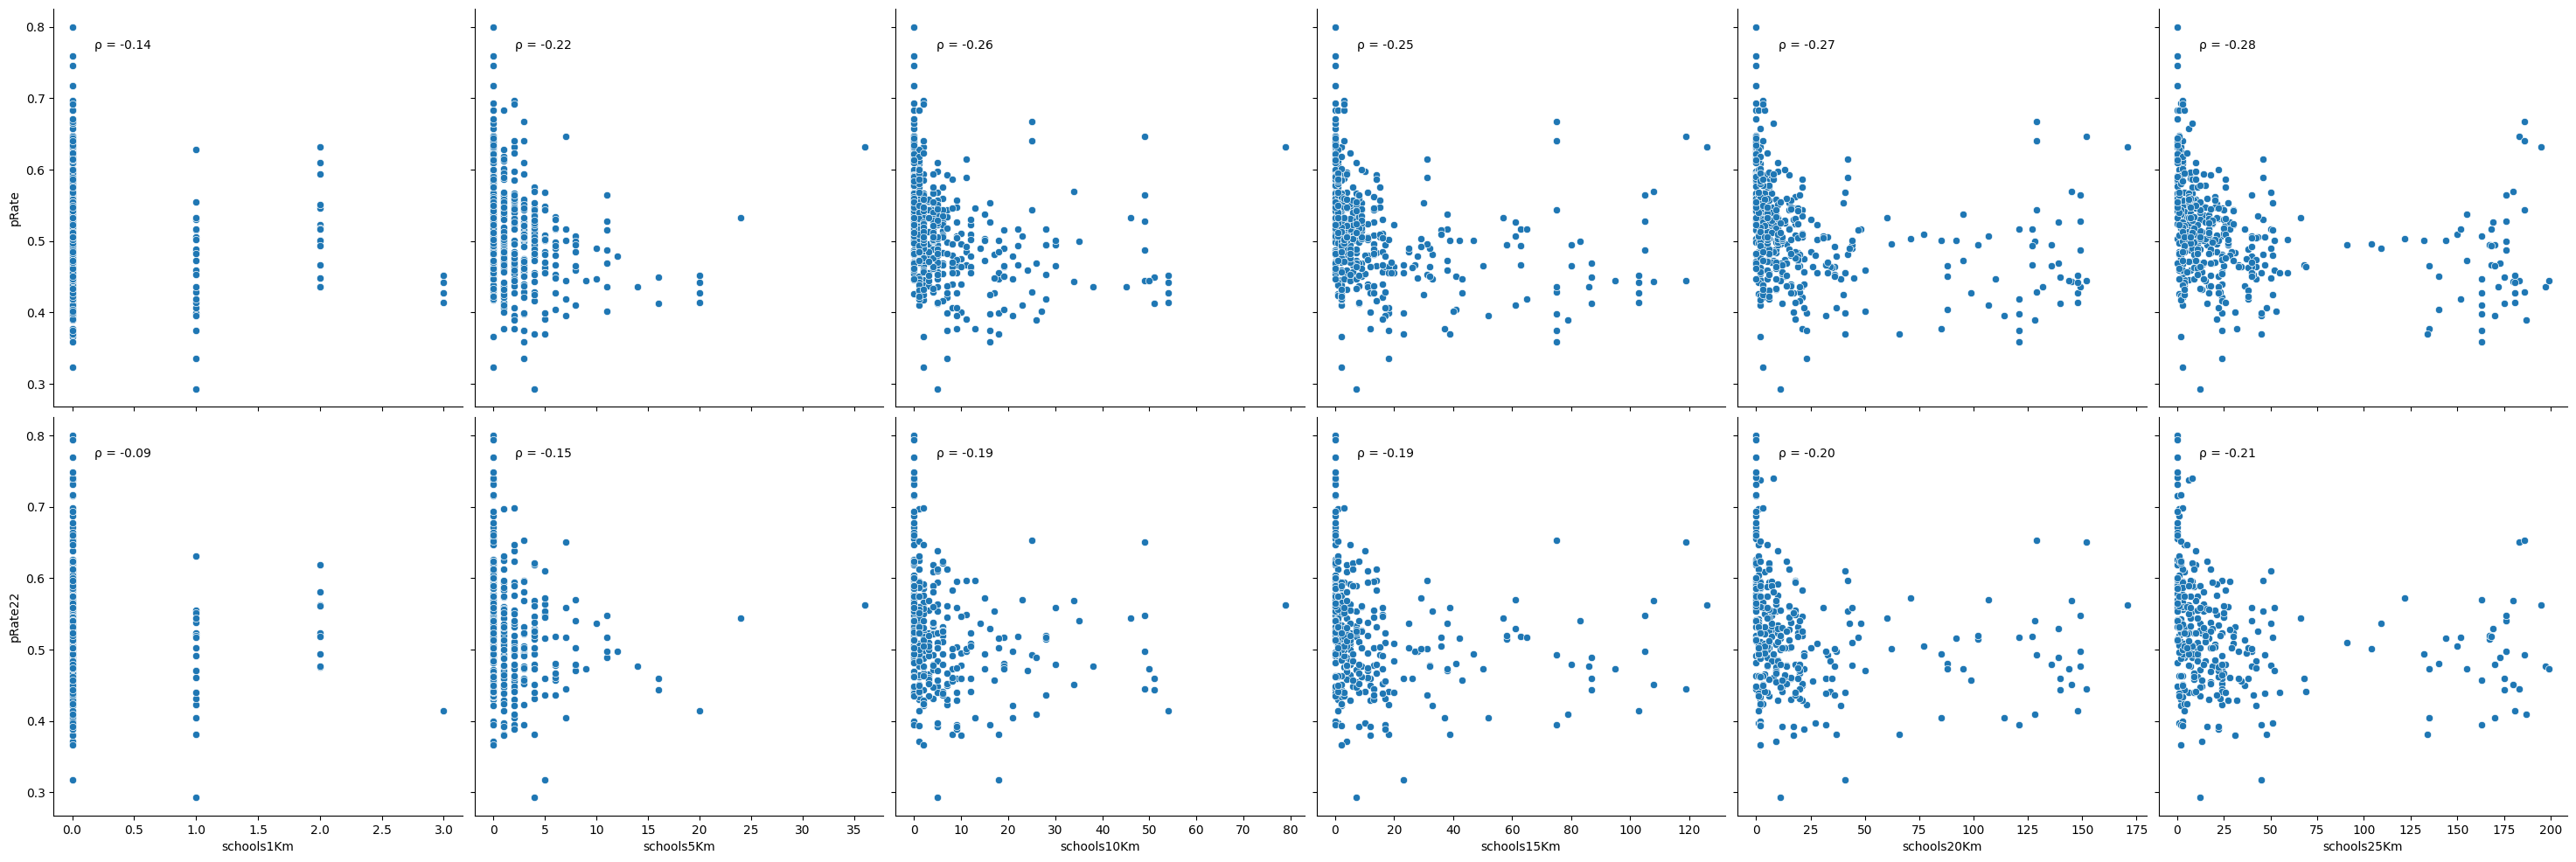

In [98]:
x_features = [_ for _ in df_test_center.columns if "schools" in _]

g = sns.pairplot(x_vars=x_features, y_vars=["pRate", "pRate22"], data=df_test_center, height=5)
g.map(corrfunc)
plt.show()

## test center features: bus_stops

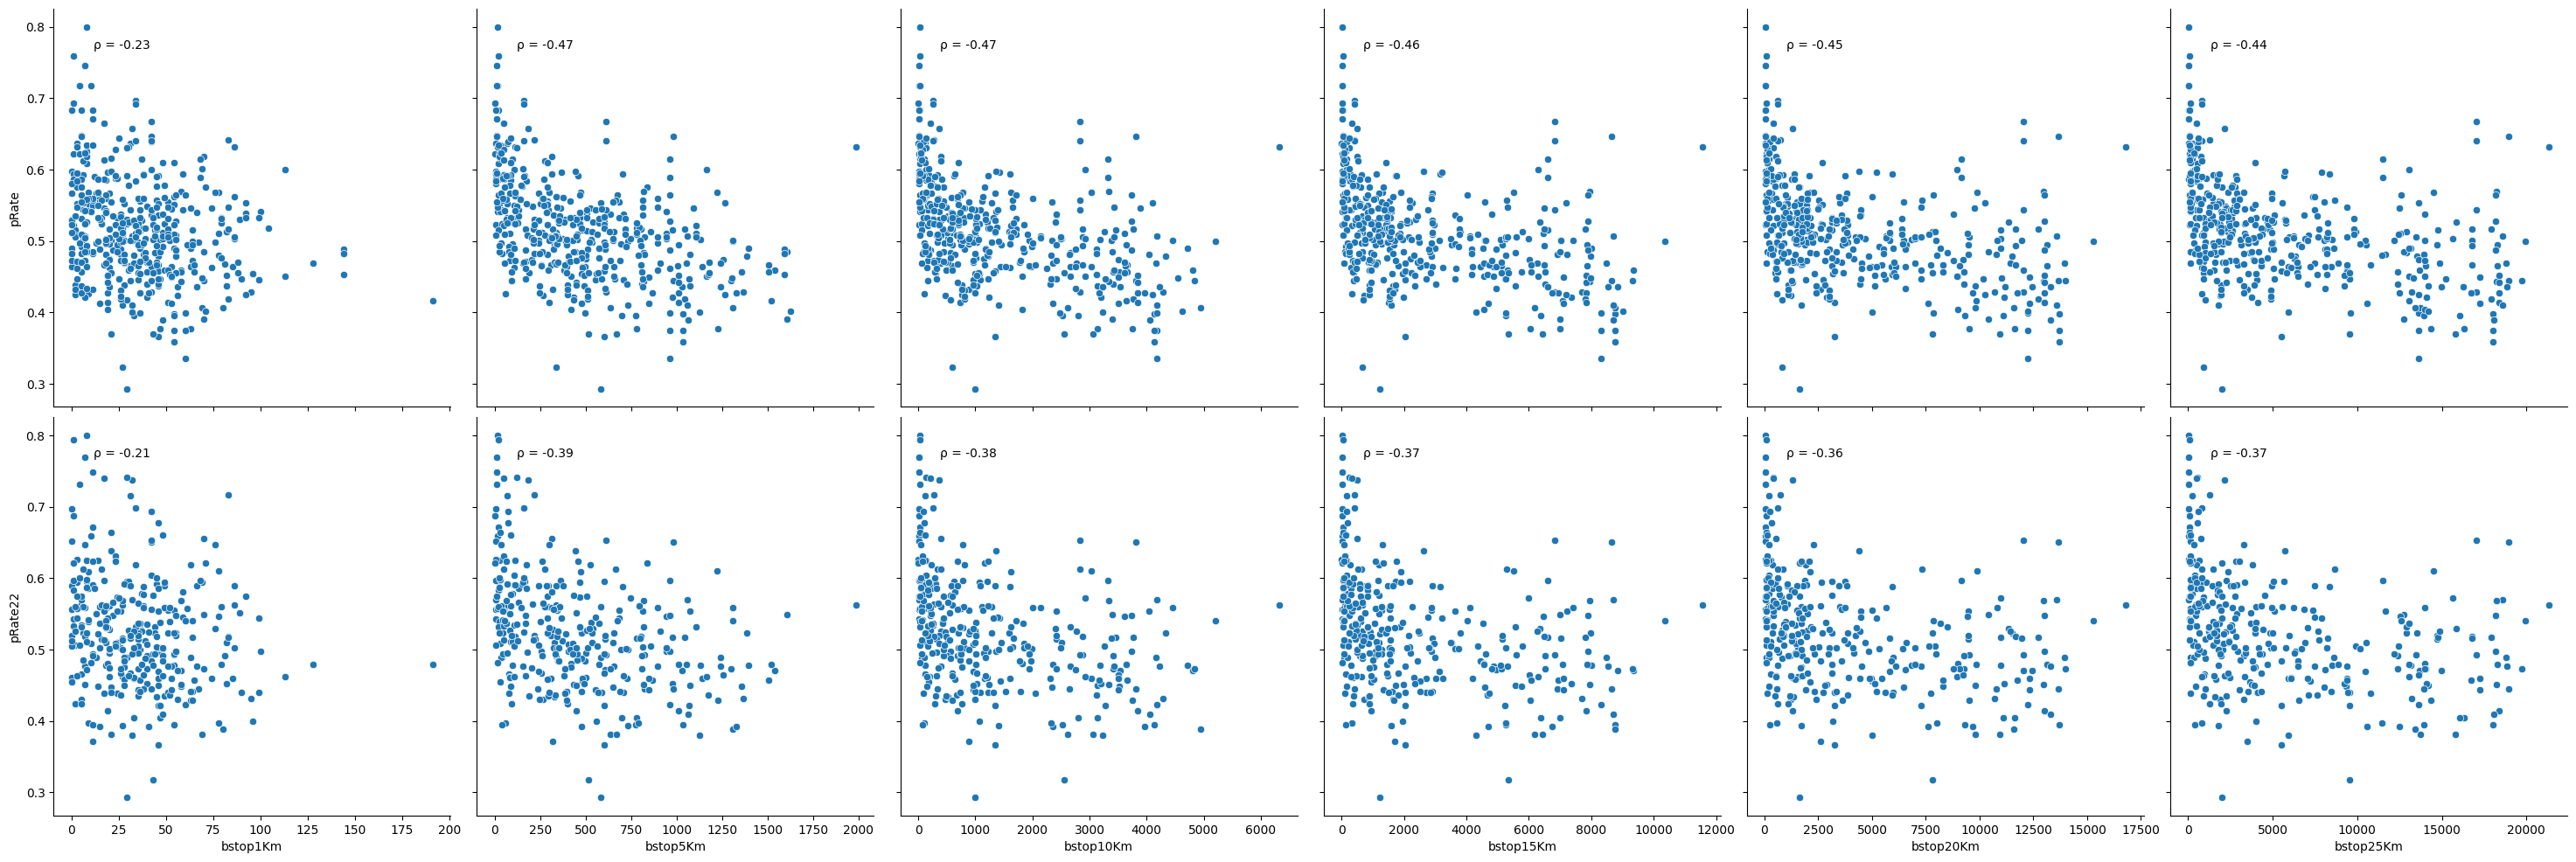

In [99]:
x_features = [_ for _ in df_test_center.columns if "bstop" in _]
g = sns.pairplot(x_vars=x_features, y_vars=["pRate", "pRate22"], data=df_test_center, height=5)
g.map(corrfunc)
plt.show()

# pRate vs non-location features
## pRate vs Year
seems that `Year` is a not good feature, because the pass rate is stable in different years

<Axes: xlabel='Year', ylabel='Pass rate'>

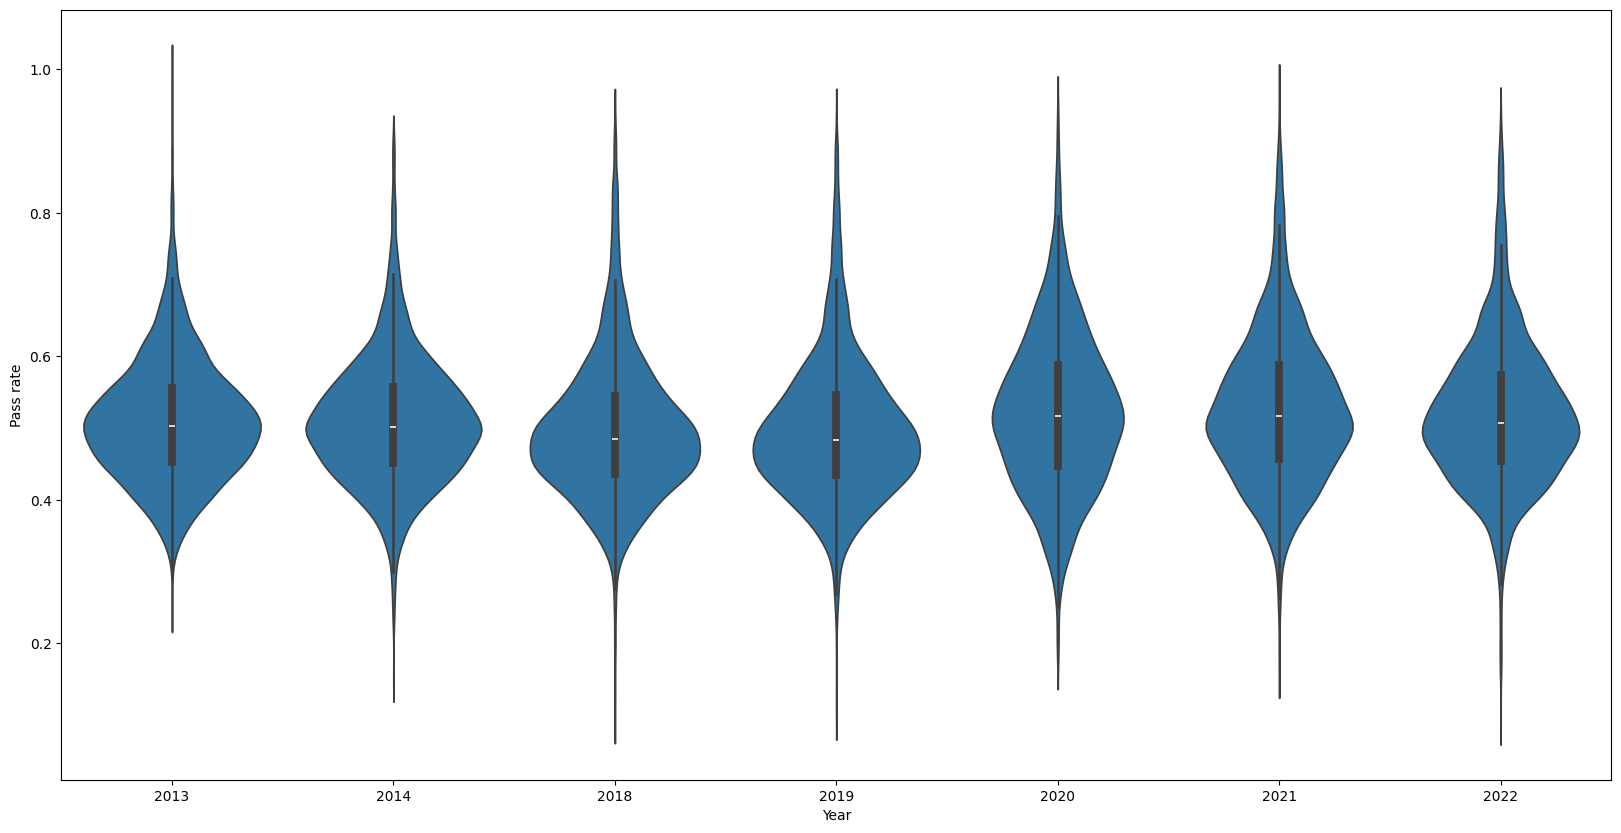

In [117]:
plt.figure(figsize=(20, 10))
sns.violinplot(x="Year", y="Pass rate", data=df_pass_rate.loc[df_pass_rate["Gender"]=="Total"])

## pRate vs Age and Gender
seems that `Age` is a good feature, the pass rate is higher for younger people
and `Gender` is a good feature, the male has higher pass rate

<Axes: xlabel='Age', ylabel='Pass rate'>

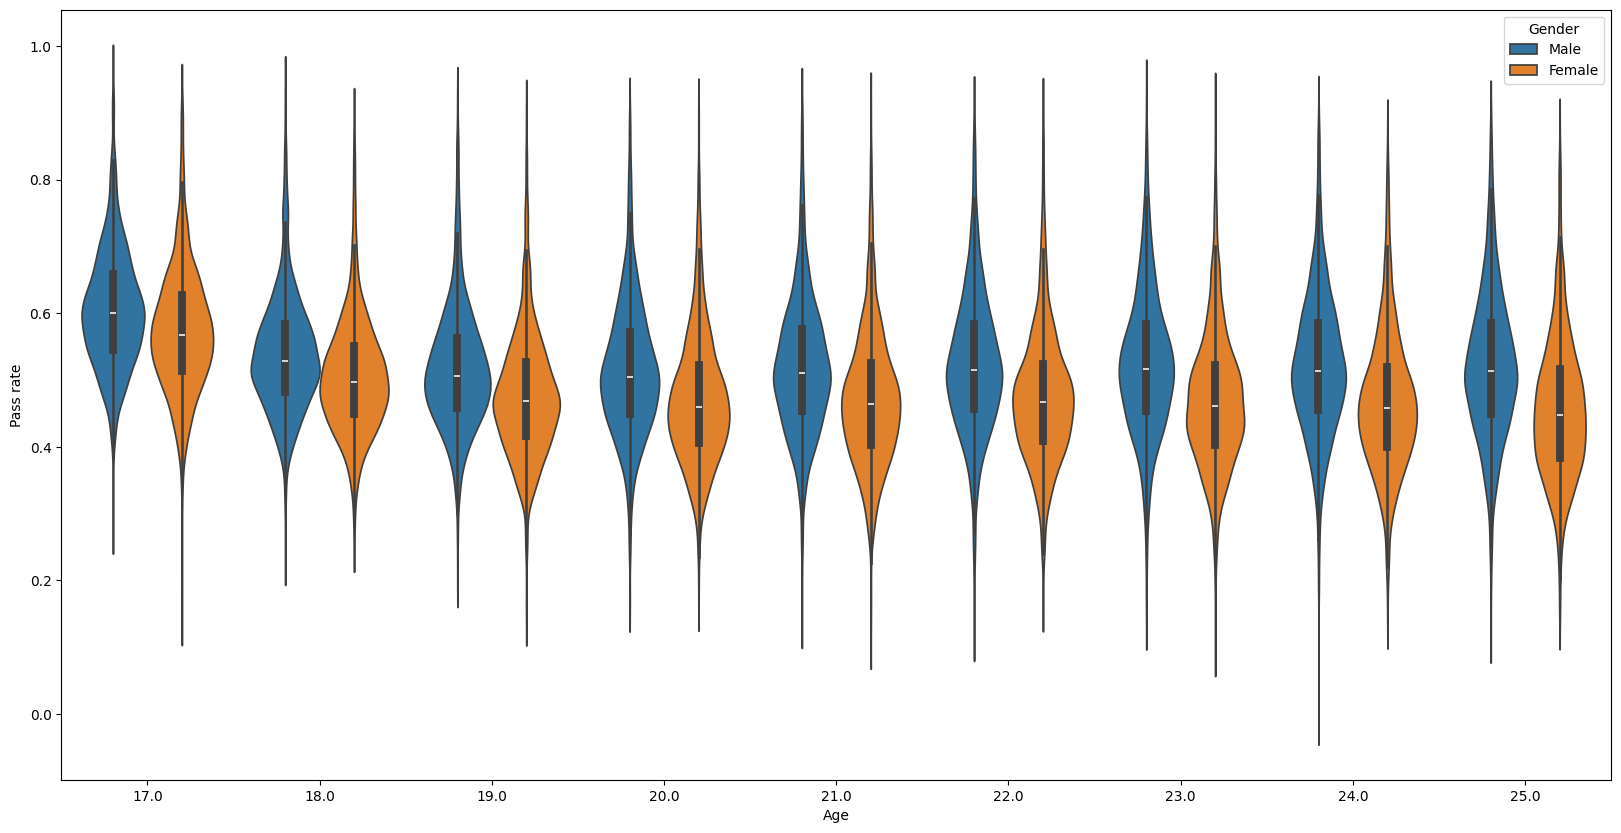

In [118]:
plt.figure(figsize=(20, 10))
sns.violinplot(x="Age", y="Pass rate",hue="Gender", data=df_pass_rate.loc[df_pass_rate["Gender"]!="Total"])

<Axes: xlabel='Age', ylabel='Pass rate'>

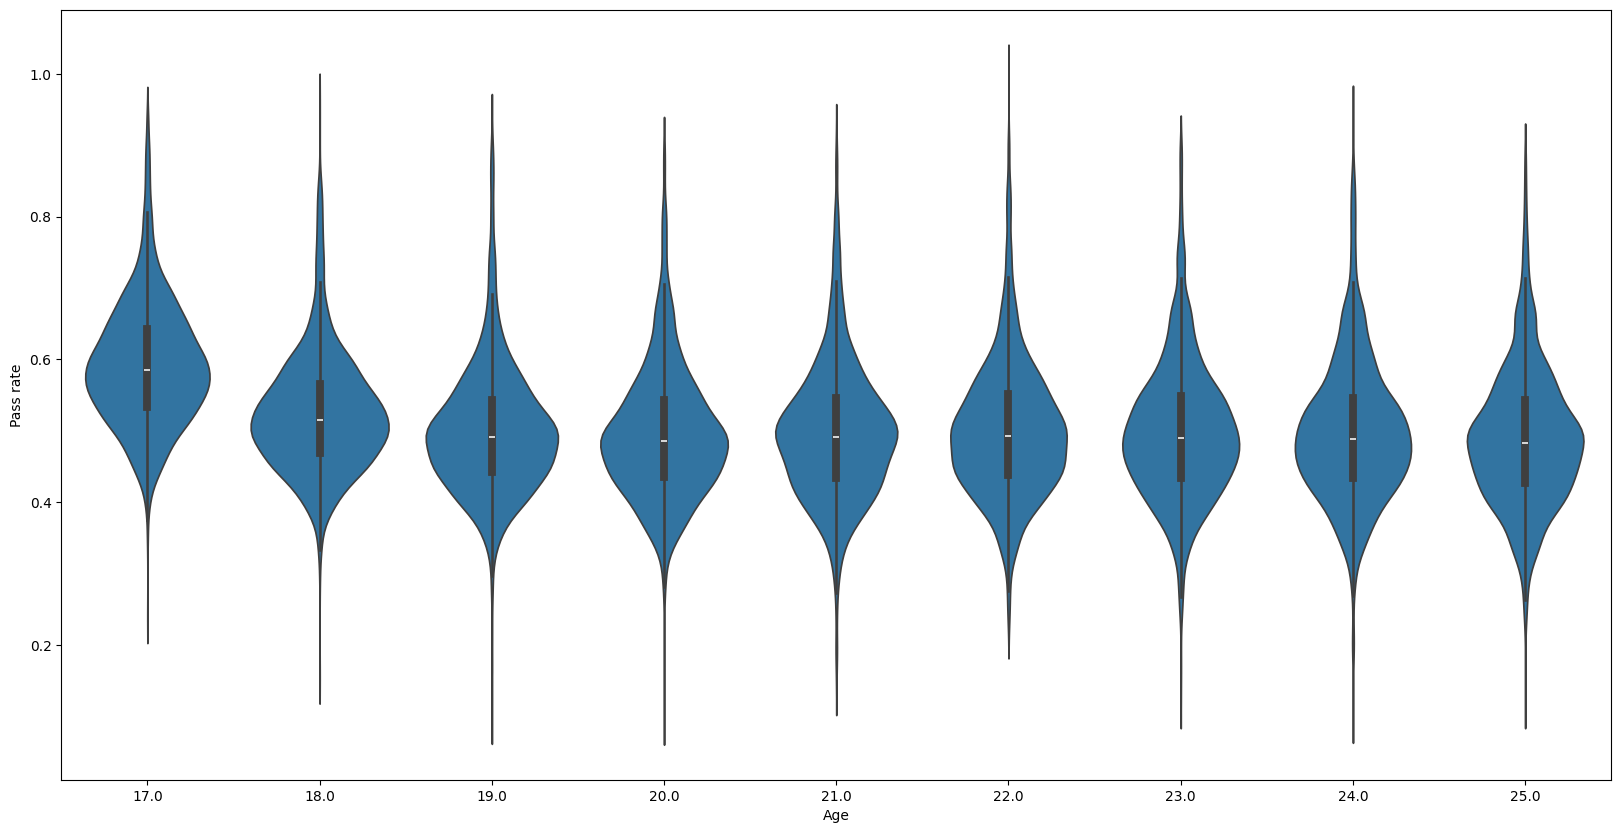

In [119]:
plt.figure(figsize=(20, 10))
sns.violinplot(x="Age", y="Pass rate", data=df_pass_rate.loc[df_pass_rate["Gender"]=="Total"])